In [41]:
df = pd.read_csv("/Users/camerondavidson-pilon/Downloads/export_od_readings_raw.csv (2).dump")

In [42]:
unit = 2

df = df.loc[df['morbidostat_unit'] == unit].copy()

In [43]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index("timestamp")

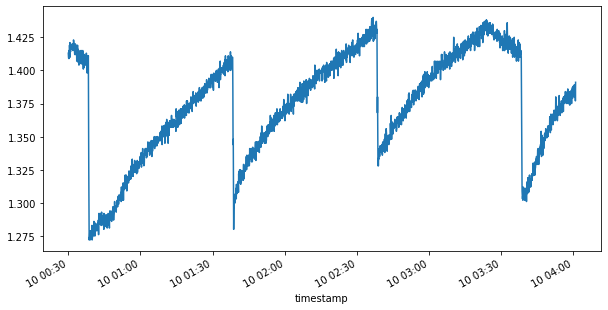

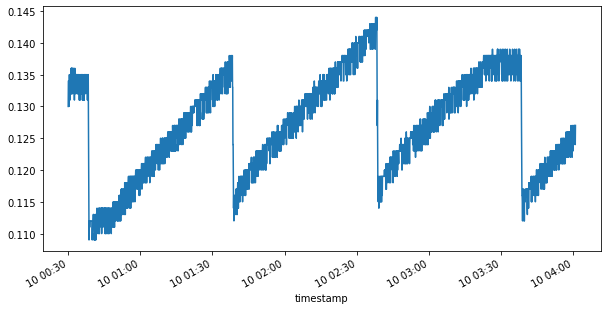

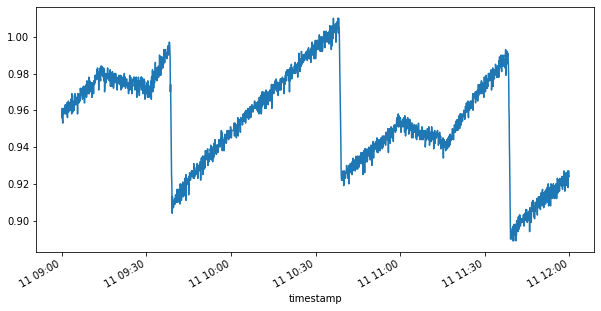

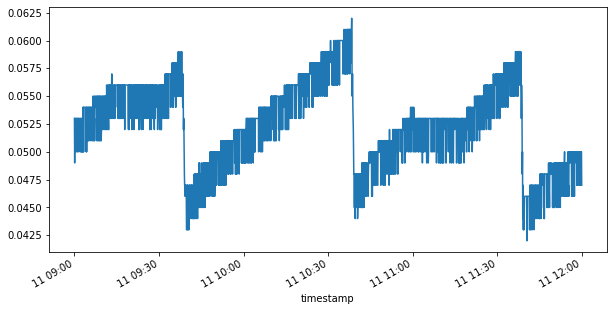

In [96]:
for _, g in df.groupby("angle"):
    plt.figure(figsize=(10,5))
    g['od_reading_v'].loc["2020-10-10 00:30":"2020-10-10 4:00"].plot()
    
    
for _, g in df.groupby("angle"):
    plt.figure(figsize=(10,5))
    g['od_reading_v'].loc["2020-10-11 09":"2020-10-11 11"].plot()

In [72]:
from scipy.optimize import curve_fit


_135 = df.loc[df['angle'] == "90"]

def expo(t, a, r):
    return a * np.exp(r * t)

start = pd.to_datetime("2020-10-08 17:39", utc=True)
end = pd.to_datetime("2020-10-08 18:39", utc=True)
results = {}

while True:
    od = _135.loc[start:end]['od_reading_v'].values
    (_, r), __ = curve_fit(expo, np.linspace(0, 1, od.shape[0]), od, p0=(1.3, 1.))
    results[end] = r
    
    start += pd.DateOffset(hours=1)
    end += pd.DateOffset(hours=1)

ValueError: `ydata` must not be empty!

In [73]:
results

{Timestamp('2020-10-08 18:39:00+0000', tz='UTC'): 0.24689744653019377,
 Timestamp('2020-10-08 19:39:00+0000', tz='UTC'): 0.2301405300031454,
 Timestamp('2020-10-08 20:39:00+0000', tz='UTC'): -0.38163041019874067,
 Timestamp('2020-10-08 21:39:00+0000', tz='UTC'): 0.6512733695679179,
 Timestamp('2020-10-08 22:39:00+0000', tz='UTC'): -0.018302186566516592,
 Timestamp('2020-10-08 23:39:00+0000', tz='UTC'): -0.14107776444795528,
 Timestamp('2020-10-09 00:39:00+0000', tz='UTC'): 0.18075059898578763,
 Timestamp('2020-10-09 01:39:00+0000', tz='UTC'): 1.3962178437217125,
 Timestamp('2020-10-09 02:39:00+0000', tz='UTC'): 0.6992296059581868,
 Timestamp('2020-10-09 03:39:00+0000', tz='UTC'): 0.5152370295437125,
 Timestamp('2020-10-09 04:39:00+0000', tz='UTC'): 0.451178935796086,
 Timestamp('2020-10-09 05:39:00+0000', tz='UTC'): 0.3244674650478902,
 Timestamp('2020-10-09 06:39:00+0000', tz='UTC'): 0.2892449140559546,
 Timestamp('2020-10-09 07:39:00+0000', tz='UTC'): 0.2505151067855887,
 Timestamp('

<AxesSubplot:xlabel='timestamp'>

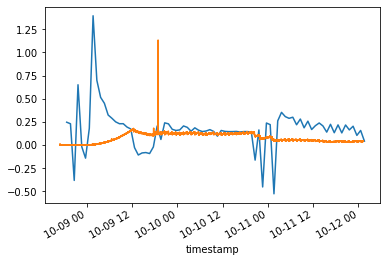

In [74]:
pd.Series(results).plot()
_135['od_reading_v'].plot()

In [76]:
from morbidostat.utils.streaming_calculations import ExtendedKalmanFilter


initial_state = np.array([0.05, 0])
d = initial_state.shape[0]

# empirically selected
initial_covariance = np.block(
    [[1e-5 * np.ones((d - 1, d - 1)), 1e-8 * np.ones((d - 1, 1))], [1e-8 * np.ones((1, d - 1)), 1e-8]]
)
OD_process_covariance = np.array([[1e-5]])

# think of rate_process_variance as a weighting between how much do I trust the model (lower value => rate_t = rate_{t-1}) vs how much do I trust the observations
rate_process_variance = 1e-11
process_noise_covariance = np.block(
    [[OD_process_covariance, 0 * np.ones((d - 1, 1))], [0 * np.ones((1, d - 1)), rate_process_variance]]
)
observation_noise_covariance = 1e-2 * np.eye(d - 1)

ekf = ExtendedKalmanFilter(initial_state, initial_covariance, process_noise_covariance, observation_noise_covariance)

In [80]:
for v in _135['od_reading_v']:
    ekf.update()

0.013000396740623187
0.002000061037018952
-0.002000061037018952
0.002000061037018952
0.002000061037018952
0.002000061037018952
0.002000061037018952
-0.002000061037018952
0.002000061037018952
0.002000061037018952
0.002000061037018952
0.002000061037018952
0.002000061037018952
-0.002000061037018952
0.002000061037018952
0.002000061037018952
-0.002000061037018952
-0.002000061037018952
0.002000061037018952
0.002000061037018952
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.0015000457777642141
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.00

0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
-0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.0015000457777642141
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
-0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.0015000457777642141
0.0015000457777642141
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.0015000457777642141
0.001750053407391583
-0.001750053407391583
0.0015000457777642141
0.001750053407391583
-0.001750053407391583
-0.001750053407391583
0.00175005340739

-0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
-0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001250038148136845
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.00175005340739158

0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.0015000457777642141
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
-0.001750053407391583
0.001750053407391583
0.0015000457777642141
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.001750053407391583
0.0

0.0
0.0030000915555284282
0.0030000915555284282
0.0030000915555284282
0.0
0.0030000915555284282
0.0030000915555284282
0.0030000915555284282
0.0030000915555284282
0.0
0.003500106814783166
0.0030000915555284282
0.0030000915555284282
0.0030000915555284282
0.0
0.0
0.0030000915555284282
0.003500106814783166
0.003500106814783166
0.003500106814783166
0.0030000915555284282
0.0015000457777642141
0.0030000915555284282
0.003500106814783166
0.0
0.0
0.003500106814783166
0.003500106814783166
0.003500106814783166
0.0
0.003500106814783166
0.003500106814783166
0.0
0.003500106814783166
0.003500106814783166
0.0
0.0
0.003500106814783166
0.003500106814783166
0.003500106814783166
0.00250007629627369
0.003500106814783166
0.0
0.003500106814783166
0.003500106814783166
0.0
0.003500106814783166
0.0
0.003500106814783166
0.0
0.003500106814783166
0.003500106814783166
0.0
0.003500106814783166
0.003500106814783166
0.003500106814783166
0.0
0.000500015259254738
0.003500106814783166
0.0
0.000500015259254738
0.0040001220

0.014500442518387403
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.011000335703604236
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.011500350962858974
0.014500442518387403
0.011500350962858974
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.01500045777764214
0.011000335703604236
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.01500045777764214
0.01500045777764214
0.011500350962858974
0.011500350962858974
0.014500442518387403
0.014500442518387403
0.014500442518387403
0.01500045777764214
0.011500350962858974
0.012000366222113713
0.01500045777764214
0.011500350962858974
0.014500442518387403
0.01500045777764214
0.014500442518387403
0.01500045777764214
0.011500350962858974
0.01500045777764214
0.01500045777764214
0.01500045777764214
0.01500045777764214
0.011500350962858974
0.01500045777764214
0.01500045777764214
0.011500350962858974
0.015

0.026500808740501116
0.026500808740501116
0.026500808740501116
0.026500808740501116
0.02700082399975585
0.02700082399975585
0.026500808740501116
0.023500717184972687
0.02700082399975585
0.02700082399975585
0.023500717184972687
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.023500717184972687
0.023500717184972687
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.023500717184972687
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02700082399975585
0.02750083925901059
0.02700082399975585
0.024000732444227426
0.02750083925901059
0.02750083925901059
0.02750083925901059
0.02750083925901059
0.02750083925901059
0.02750083925901059
0.0275008

0.03300100711081271
0.03300100711081271
0.03300100711081271
0.03300100711081271
0.03300100711081271
0.03300100711081271
0.03350102237006745
0.03350102237006745
0.03000091555528428
0.03350102237006745
0.03350102237006745
0.03350102237006745
0.03000091555528428
0.03300100711081271
0.03000091555528428
0.03350102237006745
0.03350102237006745
0.03350102237006745
0.03350102237006745
0.03350102237006745
0.03350102237006745
0.03000091555528428
0.03350102237006745
0.03000091555528428
0.03000091555528428
0.03350102237006745
0.03350102237006745
0.03400103762932219
0.03350102237006745
0.03350102237006745
0.03000091555528428
0.03350102237006745
0.03400103762932219
0.03050093081453902
0.03400103762932219
0.03350102237006745
0.03050093081453902
0.03350102237006745
0.03350102237006745
0.03400103762932219
0.03050093081453902
0.03400103762932219
0.03050093081453902
0.03400103762932219
0.03350102237006745
0.03400103762932219
0.03400103762932219
0.03400103762932219
0.03400103762932219
0.03400103762932219


0.0500015259254738
0.04650141911069063
0.04650141911069063
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.050501541184728535
0.0500015259254738
0.0500015259254738
0.047001434369945375
0.0500015259254738
0.0500015259254738
0.050501541184728535
0.047001434369945375
0.0500015259254738
0.050501541184728535
0.047001434369945375
0.0500015259254738
0.050501541184728535
0.050501541184728535
0.0500015259254738
0.050501541184728535
0.047001434369945375
0.0500015259254738
0.050501541184728535
0.050501541184728535
0.050501541184728535
0.050501541184728535
0.050501541184728535
0.047001434369945375
0.050501541184728535
0.050501541184728535
0.047001434369945375
0.050501541184728535
0.050501541184728535
0.050501541184728535
0.04750144962920011
0.050501541184728535
0.047001434369945375
0.04750144962920011
0.047001434369945375
0.051001556443983284
0.05050154118

0.08400256355479599
0.08400256355479599
0.08400256355479599
0.08400256355479599
0.08400256355479599
0.08400256355479599
0.08400256355479599
0.08400256355479599
0.08500259407330546
0.08500259407330546
0.08400256355479599
0.08100247199926756
0.08100247199926756
0.08500259407330546
0.08500259407330546
0.08500259407330546
0.08400256355479599
0.08500259407330546
0.08400256355479599
0.08500259407330546
0.08500259407330546
0.08100247199926756
0.08100247199926756
0.08100247199926756
0.08500259407330546
0.08500259407330546
0.08500259407330546
0.08500259407330546
0.08500259407330546
0.08500259407330546
0.08200250251777702
0.08200250251777702
0.08500259407330546
0.08500259407330546
0.08500259407330546
0.08200250251777702
0.08500259407330546
0.08500259407330546
0.08200250251777702
0.08500259407330546
0.08500259407330546
0.08500259407330546
0.08600262459181494
0.08500259407330546
0.08500259407330546
0.08600262459181494
0.08600262459181494
0.08200250251777702
0.08200250251777702
0.08200250251777702


0.1290039368877224
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.1290039368877224
0.13200402844325085
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13300405896176032
0.13200402844325085
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.1290039368877224
0.13000396740623188
0.1290039368877224
0.13300405896176032
0.13300405896176032
0.1290039368877224
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13000396740623188
0.13300405896176032
0.13300405896176032
0.13000396740623188
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.134004

0.15800482192449722
0.15500473036896878
0.15800482192449722
0.15800482192449722
0.15800482192449722
0.15800482192449722
0.1540046998504593
0.15500473036896878
0.15500473036896878
0.15700479140598772
0.15800482192449722
0.15800482192449722
0.15500473036896878
0.15800482192449722
0.15500473036896878
0.15800482192449722
0.15800482192449722
0.1590048524430067
0.15500473036896878
0.15800482192449722
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.15500473036896878
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.15500473036896878
0.1590048524430067
0.15500473036896878
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.1590048524430067
0.15600476088747825
0.15600476088747825
0.1590048524430067
0.1590048524430067
0.15600476088747825
0.1590048524430067
0.15600476088747825
0.15600476088747825
0.16000488296151616
0.1590048524430067
0.15600476088747825
0.15600476088747825
0.

0.13200402844325085
0.13200402844325085
0.12800390636921294
0.13200402844325085
0.13200402844325085
0.12800390636921294
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.1290039368877224
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13100399792474135
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13200402844325085
0.13300405896176032
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.1290039368877224
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.1290039368877224
0.13300405896176032
0.13000396740623188
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13000

0.11400347911008027
0.11500350962858975
0.11100338755455184
0.11100338755455184
0.11400347911008027
0.11500350962858975
0.11400347911008027
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11100338755455184
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11100338755455184
0.11500350962858975
0.11200341807306133
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11200341807306133
0.11500350962858975
0.11200341807306133
0.11500350962858975
0.11500350962858975
0.11600354014709922
0.11600354014709922
0.11500350962858975
0.11200341807306133
0.11600354014709922
0.11600354014709922
0.11600354014709922
0.11600354014709922
0.11200341807306133
0.11600354014709922
0.11600354014709922
0.11200341807306133
0.11600354014709922
0.11600354014709922
0.11600354014709922
0.11200341807306133
0.11600354014709922
0.11600354014709922
0.11600354014709922
0.11300344859157077


0.11900363170262765
0.12200372325815607
0.12000366222113712
0.12300375377666554
0.12300375377666554
0.11900363170262765
0.12400378429517506
0.12300375377666554
0.12000366222113712
0.11900363170262765
0.12000366222113712
0.12400378429517506
0.12300375377666554
0.11900363170262765
0.12000366222113712
0.12400378429517506
0.12300375377666554
0.12300375377666554
0.12400378429517506
0.12300375377666554
0.12300375377666554
0.12300375377666554
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.1210036927396466
0.12400378429517506
0.12300375377666554
0.12400378429517506
0.1250038148136845
0.1210036927396466
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12000366222113712
0.12400378429517506
0.1210036927396466
0.1210036927396466
0.1210036927396466
0.12400378429517506
0.12000366222113712
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.1250038148136845
0.1250038148136845
0.1250038148136845
0.12400378429517506
0.1250038

0.13300405896176032
0.13200402844325085
0.13200402844325085
0.13300405896176032
0.13000396740623188
0.13200402844325085
0.13200402844325085
0.1290039368877224
0.13300405896176032
0.13300405896176032
0.13000396740623188
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13300405896176032
0.13200402844325085
0.13300405896176032
0.13000396740623188
0.1290039368877224
0.1290039368877224
0.1340040894802698
0.1340040894802698
0.1340040894802698
0.1340040894802698
0.1340040894802698
0.13300405896176032
0.13300405896176032
0.1340040894802698
0.13300405896176032
0.13300405896176032
0.1340040894802698
0.13100399792474135
0.1340040894802698
0.1340040894802698
0.1340040894802698
0.1340040894802698
0.1340040894802698
0.13100399792474135
0.13200402844325085
0.1340040894802698
0.13500411999877926
0.13000396740623188
0.1340040894802698
0.1340040894802698
0.13100399792474135
0.13100399792474135
0.13500411999877926
0.13500411999877926
0.1350041199987792

0.13100399792474135
0.13200402844325085
0.1340040894802698
0.13100399792474135
0.1340040894802698
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.1340040894802698
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13100399792474135
0.1340040894802698
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13300405896176032
0.1340040894802698
0.13200402844325085
0.13200402844325085
0.13500411999877926
0.13200402844325085
0.13500411999877926
0.13500411999877926
0.13200402844325085
0.13500411999877926
0.13200402844325085
0.13300405896176032
0.13500411999877926
0.13500411999877926
0.13300405896176032
0.13500411999877926
0.13500411999877926
0.13200402844325085
0.13500411999877926
0.1340040894802698
0.13100399792474135
0.13600415051728876
0.13500411999877926
0.13200402844325085
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13300405896176032
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13600415051728876
0.1360

0.12800390636921294
0.12700387585070344
0.12800390636921294
0.12600384533219394
0.12400378429517506
0.12700387585070344
0.12700387585070344
0.12800390636921294
0.12800390636921294
0.12800390636921294
0.12800390636921294
0.12700387585070344
0.12800390636921294
0.12400378429517506
0.12800390636921294
0.12800390636921294
0.12700387585070344
0.12800390636921294
0.1250038148136845
0.12700387585070344
0.12400378429517506
0.12800390636921294
0.12800390636921294
0.12800390636921294
0.12800390636921294
0.1290039368877224
0.12800390636921294
0.1250038148136845
0.12800390636921294
0.12800390636921294
0.1290039368877224
0.1290039368877224
0.1290039368877224
0.1290039368877224
0.1250038148136845
0.12800390636921294
0.1290039368877224
0.12800390636921294
0.1290039368877224
0.1290039368877224
0.1290039368877224
0.1290039368877224
0.1290039368877224
0.12600384533219394
0.1290039368877224
0.1290039368877224
0.1290039368877224
0.12600384533219394
0.1290039368877224
0.1290039368877224
0.12600384533219394

0.11800360118411818
0.11800360118411818
0.11800360118411818
0.11900363170262765
0.11800360118411818
0.11800360118411818
0.11800360118411818
0.11500350962858975
0.11900363170262765
0.11500350962858975
0.11900363170262765
0.11900363170262765
0.11500350962858975
0.11500350962858975
0.11900363170262765
0.11900363170262765
0.11600354014709922
0.11900363170262765
0.11900363170262765
0.11900363170262765
0.11900363170262765
0.11900363170262765
0.11900363170262765
0.11900363170262765
0.11900363170262765
0.11900363170262765
0.11900363170262765
0.12000366222113712
0.11900363170262765
0.12000366222113712
0.12000366222113712
0.12000366222113712
0.12000366222113712
0.11900363170262765
0.1170035706656087
0.1210036927396466
0.1170035706656087
0.1170035706656087
0.12000366222113712
0.1210036927396466
0.12000366222113712
0.12000366222113712
0.12000366222113712
0.12000366222113712
0.11800360118411818
0.1210036927396466
0.12000366222113712
0.12000366222113712
0.1210036927396466
0.1210036927396466
0.121003

0.13000396740623188
0.12700387585070344
0.13100399792474135
0.13000396740623188
0.13100399792474135
0.13100399792474135
0.1290039368877224
0.13100399792474135
0.13100399792474135
0.13100399792474135
0.13100399792474135
0.13000396740623188
0.13000396740623188
0.13100399792474135
0.13100399792474135
0.13100399792474135
0.13100399792474135
0.13100399792474135
0.13100399792474135
0.13100399792474135
0.12800390636921294
0.12800390636921294
0.13100399792474135
0.13100399792474135
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.13100399792474135
0.13100399792474135
0.13100399792474135
0.1290039368877224
0.12800390636921294
0.13200402844325085
0.13200402844325085
0.13100399792474135
0.12800390636921294
0.13200402844325085
0.13200402844325085
0.13100399792474135
0.13200402844325085
0.13200402844325085
0.13300405896176032
0.13200402844325085
0.1290039368877224
0.13200402844325085
0.1290039368877224
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.13200402844325085
0.133

0.11400347911008027
0.11400347911008027
0.11100338755455184
0.11500350962858975
0.11200341807306133
0.11400347911008027
0.11100338755455184
0.11000335703604236
0.11100338755455184
0.11400347911008027
0.11400347911008027
0.11500350962858975
0.11400347911008027
0.11500350962858975
0.11400347911008027
0.11400347911008027
0.11100338755455184
0.11400347911008027
0.11500350962858975
0.11100338755455184
0.11400347911008027
0.11500350962858975
0.11400347911008027
0.11400347911008027
0.11500350962858975
0.11400347911008027
0.11500350962858975
0.11400347911008027
0.11200341807306133
0.11400347911008027
0.11400347911008027
0.11400347911008027
0.11400347911008027
0.11100338755455184
0.11500350962858975
0.11400347911008027
0.11400347911008027
0.11500350962858975
0.11100338755455184
0.11500350962858975
0.11400347911008027
0.11400347911008027
0.11200341807306133
0.11100338755455184
0.11400347911008027
0.11500350962858975
0.11100338755455184
0.11500350962858975
0.11400347911008027
0.11100338755455184


0.11800360118411818
0.1210036927396466
0.11800360118411818
0.11800360118411818
0.1210036927396466
0.12000366222113712
0.1210036927396466
0.12200372325815607
0.11800360118411818
0.12000366222113712
0.1210036927396466
0.12200372325815607
0.1210036927396466
0.1210036927396466
0.1210036927396466
0.11800360118411818
0.11800360118411818
0.12200372325815607
0.11800360118411818
0.12200372325815607
0.12200372325815607
0.12200372325815607
0.12200372325815607
0.11800360118411818
0.12200372325815607
0.11800360118411818
0.12000366222113712
0.1210036927396466
0.12200372325815607
0.1210036927396466
0.12200372325815607
0.11900363170262765
0.12000366222113712
0.12300375377666554
0.11800360118411818
0.12200372325815607
0.12200372325815607
0.12200372325815607
0.12200372325815607
0.12200372325815607
0.12200372325815607
0.12200372325815607
0.12200372325815607
0.12300375377666554
0.12200372325815607
0.12300375377666554
0.1210036927396466
0.11900363170262765
0.11900363170262765
0.1210036927396466
0.123003753

0.11900363170262765
0.11900363170262765
0.11900363170262765
0.11500350962858975
0.11800360118411818
0.11900363170262765
0.11500350962858975
0.11500350962858975
0.1170035706656087
0.11500350962858975
0.11500350962858975
0.11500350962858975
0.11800360118411818
0.11500350962858975
0.11600354014709922
0.11500350962858975
0.11900363170262765
0.11600354014709922
0.11900363170262765
0.11500350962858975
0.11600354014709922
0.12000366222113712
0.11900363170262765
0.12000366222113712
0.11900363170262765
0.11900363170262765
0.11600354014709922
0.1170035706656087
0.11900363170262765
0.11800360118411818
0.11600354014709922
0.11900363170262765
0.12000366222113712
0.12000366222113712
0.12000366222113712
0.11900363170262765
0.11900363170262765
0.12000366222113712
0.11900363170262765
0.12000366222113712
0.12000366222113712
0.11600354014709922
0.11900363170262765
0.12000366222113712
0.1170035706656087
0.12000366222113712
0.12000366222113712
0.1210036927396466
0.12000366222113712
0.12000366222113712
0.12

0.12400378429517506
0.12400378429517506
0.12000366222113712
0.12300375377666554
0.12000366222113712
0.12000366222113712
0.12200372325815607
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.1210036927396466
0.1210036927396466
0.1210036927396466
0.1250038148136845
0.1210036927396466
0.12400378429517506
0.12400378429517506
0.1210036927396466
0.12200372325815607
0.12300375377666554
0.1250038148136845
0.1250038148136845
0.1250038148136845
0.12400378429517506
0.1250038148136845
0.1250038148136845
0.12400378429517506
0.12400378429517506
0.1250038148136845
0.1250038148136845
0.1250038148136845
0.12200372325815607
0.1250038148136845
0.1210036927396466
0.12600384533219394
0.12400378429517506
0.1210036927396466
0.12400378429517506
0.1210036927396466
0.12600384533219394
0.12400378429517506
0.1250038148136845
0.12600384533219394
0.12400378429517506
0.12400378429517506
0.12600384533219394
0.12200372325815607
0.12200372325815607
0.1210036927396466
0.12600384533219394


0.13300405896176032
0.13500411999877926
0.1340040894802698
0.13300405896176032
0.1340040894802698
0.13000396740623188
0.13500411999877926
0.13500411999877926
0.1340040894802698
0.13500411999877926
0.1340040894802698
0.13100399792474135
0.13500411999877926
0.1340040894802698
0.13300405896176032
0.13100399792474135
0.13500411999877926
0.1340040894802698
0.13500411999877926
0.1340040894802698
0.13100399792474135
0.13500411999877926
0.1340040894802698
0.13200402844325085
0.13100399792474135
0.1340040894802698
0.13100399792474135
0.1340040894802698
0.13500411999877926
0.13500411999877926
0.13100399792474135
0.13500411999877926
0.13500411999877926
0.13300405896176032
0.13100399792474135
0.1340040894802698
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.1340040894802698
0.13200402844325085
0.13200402844325085
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13600415051728876
0.13500411999877926
0.13600415051728876
0.13500411999877926
0.13200402844325085
0.1350041199

0.12200372325815607
0.12300375377666554
0.12300375377666554
0.12200372325815607
0.12300375377666554
0.12300375377666554
0.12400378429517506
0.12000366222113712
0.12300375377666554
0.12400378429517506
0.12300375377666554
0.12400378429517506
0.12300375377666554
0.1250038148136845
0.12300375377666554
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12400378429517506
0.12300375377666554
0.1210036927396466
0.12000366222113712
0.11900363170262765
0.1210036927396466
0.1210036927396466
0.12400378429517506
0.12300375377666554
0.12000366222113712
0.12400378429517506
0.12400378429517506
0.1250038148136845
0.12400378429517506
0.1210036927396466
0.1250038148136845
0.1210036927396466
0.12300375377666554
0.1250038148136845
0.12300375377666554
0.1210036927396466
0.12400378429517506
0.12600384533219394
0.1250038148136845
0.12400378429517506
0.12200372325815607
0.12600384533219394
0.12400378429517506
0.12400378429517506
0.124003784

0.13500411999877926
0.13200402844325085
0.13500411999877926
0.13200402844325085
0.13200402844325085
0.13500411999877926
0.13100399792474135
0.13500411999877926
0.13200402844325085
0.1340040894802698
0.13500411999877926
0.13200402844325085
0.13200402844325085
0.13500411999877926
0.13200402844325085
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13500411999877926
0.13100399792474135
0.13600415051728876
0.13600415051728876
0.13500411999877926
0.13200402844325085
0.13600415051728876
0.13200402844325085
0.13500411999877926
0.13500411999877926
0.13600415051728876
0.13500411999877926
0.13200402844325085
0.13600415051728876
0.13600415051728876
0.13600415051728876
0.13600415051728876
0.13300405896176032
0.13200402844325085
0.13600415051728876
0.13600415051728876
0.13300405896176032
0.13200402844325085
0.13500411999877926
0.13200402844325085
0.13200402844325085
0.13500411999877926
0.13600415051728876
0.13600415051728876
0.13200402844325085
0.13600415051728876
0

0.06600201422162542
0.06600201422162542
0.06600201422162542
0.06200189214758753
0.06200189214758753
0.06600201422162542
0.06600201422162542
0.06600201422162542
0.06300192266609697
0.06200189214758753
0.06600201422162542
0.06600201422162542
0.0670020447401349
0.06300192266609697
0.06300192266609697
0.06600201422162542
0.06600201422162542
0.06600201422162542
0.0670020447401349
0.06600201422162542
0.06600201422162542
0.06600201422162542
0.06600201422162542
0.06600201422162542
0.06500198370311594
0.06600201422162542
0.06300192266609697
0.06300192266609697
0.06600201422162542
0.0670020447401349
0.06600201422162542
0.06300192266609697
0.06600201422162542
0.0670020447401349
0.06300192266609697
0.06600201422162542
0.06600201422162542
0.06300192266609697
0.0670020447401349
0.0670020447401349
0.0670020447401349
0.0670020447401349
0.06300192266609697
0.0670020447401349
0.0670020447401349
0.0670020447401349
0.06600201422162542
0.0670020447401349
0.06300192266609697
0.0670020447401349
0.06700204474

0.07800238044373912
0.08200250251777702
0.07800238044373912
0.08100247199926756
0.08200250251777702
0.07900241096224861
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.07800238044373912
0.07800238044373912
0.07800238044373912
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.08300253303628652
0.07800238044373912
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.08200250251777702
0.07900241096224861
0.08300253303628652
0.08200250251777702
0.08200250251777702
0.07900241096224861
0.07900241096224861
0.08300253303628652
0.08300253303628652
0.07900241096224861
0.08200250251777702
0.08200250251777702
0.07900241096224861
0.08200250251777702
0.08300253303628652
0.07900241096224861
0.08300253303628652
0.08200250251777702
0.08300253303628652
0.08300253303628652
0.07900241096224861
0.07900241096224861
0.08000244148075808
0.08000244148075808
0.08200250251777702


0.04650141911069063
0.047001434369945375
0.04300131229590747
0.04300131229590747
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.044001342814416936
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.044001342814416936
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.04800146488845485
0.047001434369945375
0.04800146488845485
0.044001342814416936
0.047001434369945375
0.047001434369945375
0.047001434369945375
0.044001342814416936
0.04800146488845485
0.044001342814416936
0.047001434369945375
0.04800146488845485
0.04800146488845485
0.044001342814416936
0.04800146488845485
0.04800146488845485
0.04800146488845485
0.04800146488845485
0.044001342814416936
0.04800146488845485
0.044001342814416936
0.04800146488845485
0.0440

0.04800146488845485
0.04800146488845485
0.05200158696249276
0.05200158696249276
0.04800146488845485
0.05200158696249276
0.049001495406964315
0.049001495406964315
0.049001495406964315
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.049001495406964315
0.05200158696249276
0.05200158696249276
0.049001495406964315
0.049001495406964315
0.05300161748100223
0.05200158696249276
0.05200158696249276
0.05300161748100223
0.05200158696249276
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.049001495406964315
0.049001495406964315
0.05300161748100223
0.049001495406964315
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.049001495406964315
0.05300161748100223
0.049001495406964315
0.05300161748100223
0.05300161748100223
0.0500015259254738
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05000152

0.0540016479995117
0.051001556443983284
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.051001556443983284
0.051001556443983284
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.051001556443983284
0.051001556443983284
0.05500167851802118
0.051001556443983284
0.05500167851802118
0.0540016479995117
0.05500167851802118
0.0540016479995117
0.051001556443983284
0.05500167851802118
0.0540016479995117
0.05500167851802118
0.051001556443983284
0.05500167851802118
0.05500167851802118
0.051001556443983284
0.05500167851802118
0.0540016479995117
0.051001556443983284
0.05200158696249276
0.05200158696249276
0.05500167851802118
0.05500167851802118
0.051001556443983284
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.051001556443983284
0.05500167851802118
0.05500167851802118
0.05200158696249276
0.056001709036530664
0.05500167851802118
0.0540016479995117
0.05500167851802118
0.05200158696249276
0.05500167851802118
0.0540016479995117
0

0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.057001739555040135
0.057001739555040135
0.05300161748100223
0.05300161748100223
0.0540016479995117
0.0540016479995117
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.056001709036530664
0.05300161748100223
0.057001739555040135
0.057001739555040135
0.05300161748100223
0.056001709036530664
0.05300161748100223
0.057001739555040135
0.056001709036530664
0.057001739555040135
0.057001739555040135
0.057001739555040135
0.057001739555040135
0.0540016479995117
0.057001739555040135
0.057001739555040135
0.0540016479995117
0.0540016479995117
0.057001739555040135
0.0540016479995117
0.057001739555040135
0.0540016479995117
0.0540016479995117
0.057001739555040135
0.0540016479995117
0.057001739555040135
0.057001739555040135
0.057001739555040135
0.057001739555040135
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.057001739555040135
0.057001739555040135
0.056001709036530664
0.057001739555040135
0.05800

0.05300161748100223
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.05300161748100223
0.05300161748100223
0.056001709036530664
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.057001739555040135
0.056001709036530664
0.05300161748100223
0.057001739555040135
0.056001709036530664
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.056001709036530664
0.056001709036530664
0.05300161748100223
0.056001709036530664
0.05300161748100223
0.057001739555040135
0.056001709036530664
0.057001739555040135
0.05300161748100223
0.05300161748100223
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.057001739555040135
0.057001739555040135
0.056001709036530664
0.05300161748100223
0.057001739555040135
0.057001739555040135
0.057001739555040135
0.057001739555040135
0.05300161748100223
0.057001739555040135
0.0570017

0.056001709036530664
0.05300161748100223
0.05200158696249276
0.05200158696249276
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.05300161748100223
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.05300161748100223
0.05300161748100223
0.056001709036530664
0.057001739555040135
0.056001709036530664
0.056001709036530664
0.05300161748100223
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.05300161748100223
0.05500167851802118
0.056001709036530664
0.05300161748100223
0.05300161748100223
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.056001709036530664
0.0540016479995117
0.056001709036530664
0.056001709036530664
0.05300161748100223
0.056001709036530664
0.05300161748100223
0.056001709036530664
0.05300161748100223
0.053001

0.057001739555040135
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.057001739555040135
0.05800177007354961
0.05800177007354961
0.0540016479995117
0.057001739555040135
0.057001739555040135
0.0540016479995117
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.057001739555040135
0.05800177007354961
0.05500167851802118
0.05800177007354961
0.05500167851802118
0.05800177007354961
0.05800177007354961
0.05500167851802118
0.05800177007354961
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05800177007354961
0.05800177007354961
0.05500167851802118
0.05500167851802118
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.05500167851802118
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.05800177007354961
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05800177007354961
0.05800177007354961
0.05900180059205909
0.05800177007354961
0.059001800592059

0.049001495406964315
0.049001495406964315
0.05200158696249276
0.05300161748100223
0.049001495406964315
0.05300161748100223
0.05200158696249276
0.0500015259254738
0.05300161748100223
0.0500015259254738
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05200158696249276
0.049001495406964315
0.05200158696249276
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.05300161748100223
0.051001556443983284
0.05300161748100223
0.05300161748100223
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0540016479995117
0.0540016479995117
0.05300161748100223
0.05200158696249276
0.0540016479995117
0.0540016479995117
0.05300161748100223
0.0540016479995117
0.0540016479995117
0.0500015259254738
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.051001556443983284
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.0540016479995117
0.05400164799951

0.0540016479995117
0.05500167851802118
0.05500167851802118
0.051001556443983284
0.051001556443983284
0.0540016479995117
0.05500167851802118
0.0540016479995117
0.051001556443983284
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.051001556443983284
0.05500167851802118
0.051001556443983284
0.05500167851802118
0.05300161748100223
0.05500167851802118
0.05200158696249276
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05500167851802118
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.05500167851802118
0.05200158696249276
0.05500167851802118
0.05500167851802118
0.05200158696249276
0.05500167851802118
0.05200158696249276
0.05500167851802118
0.05200158696249276
0.0550016785180211

0.051001556443983284
0.04800146488845485
0.051001556443983284
0.051001556443983284
0.051001556443983284
0.04800146488845485
0.051001556443983284
0.051001556443983284
0.051001556443983284
0.0500015259254738
0.05200158696249276
0.051001556443983284
0.04800146488845485
0.051001556443983284
0.051001556443983284
0.05200158696249276
0.04800146488845485
0.05200158696249276
0.05200158696249276
0.0500015259254738
0.051001556443983284
0.04800146488845485
0.051001556443983284
0.04800146488845485
0.05200158696249276
0.04800146488845485
0.04800146488845485
0.05200158696249276
0.04800146488845485
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.04800146488845485
0.049001495406964315
0.05200158696249276
0.049001495406964315
0.05200158696249276
0.05200158696249276
0.04800146488845485
0.049001495406964315
0.04800146488845485
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.05200158696249276
0.049001495406964315
0.0520

0.049001495406964315
0.049001495406964315
0.0460014038514359
0.049001495406964315
0.0460014038514359
0.0460014038514359
0.049001495406964315
0.0460014038514359
0.0500015259254738
0.049001495406964315
0.049001495406964315
0.049001495406964315
0.049001495406964315
0.0500015259254738
0.0460014038514359
0.0460014038514359
0.0500015259254738
0.049001495406964315
0.0460014038514359
0.049001495406964315
0.049001495406964315
0.0500015259254738
0.049001495406964315
0.0460014038514359
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0460014038514359
0.0500015259254738
0.0500015259254738
0.0460014038514359
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.0500015259254738
0.049001495406964315
0.044001342814416936
0.0460014038514359
0.042001281777398
0.04300131229590747
0.042001281777398
0.04100125125888852
0.037001129184850615
0.038001159703360085

0.04300131229590747
0.04300131229590747
0.04300131229590747
0.04300131229590747
0.043501327555162214
0.043501327555162214
0.043501327555162214
0.043501327555162214
0.044001342814416936
0.043501327555162214
0.04000122074037904
0.04000122074037904
0.043501327555162214
0.04050123599963378
0.043501327555162214
0.043501327555162214
0.043501327555162214
0.04000122074037904
0.043501327555162214
0.04000122074037904
0.04100125125888852
0.043501327555162214
0.04300131229590747
0.043501327555162214
0.043501327555162214
0.043501327555162214
0.043501327555162214
0.04150126651814326
0.043501327555162214
0.04000122074037904
0.043501327555162214
0.04300131229590747
0.04000122074037904
0.04300131229590747
0.043501327555162214
0.043501327555162214
0.043501327555162214
0.043501327555162214
0.04300131229590747
0.04300131229590747
0.04300131229590747
0.04300131229590747
0.04000122074037904
0.04300131229590747
0.03950120548112431
0.04300131229590747
0.04300131229590747
0.03950120548112431
0.0430013122959074

0.03400103762932219
0.034501052888576925
0.03750114444410535
0.038001159703360085
0.03750114444410535
0.038001159703360085
0.03750114444410535
0.038001159703360085
0.03750114444410535
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.034501052888576925
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.03750114444410535
0.034501052888576925
0.034501052888576925
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.034501052888576925
0.038001159703360085
0.038001159703360085
0.03500106814783166
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.038501174962614834
0.038001159703360085
0.034501052888576925
0.038501174962614834
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.038501174962614834
0.038001159703360085
0.034501052888576925
0.038501174962614834
0.038001159703360085
0.03500106814783166
0.038501174962614834
0.03500106814783166
0.038001159703360085
0.037001129184850615
0.03500106814783166
0.

0.03600109866634114
0.036501113925595866
0.03300100711081271
0.03600109866634114
0.036501113925595866
0.036501113925595866
0.03300100711081271
0.036501113925595866
0.03300100711081271
0.036501113925595866
0.03300100711081271
0.03300100711081271
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.03600109866634114
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.037001129184850615
0.036501113925595866
0.03600109866634114
0.03600109866634114
0.036501113925595866
0.03300100711081271
0.036501113925595866
0.036501113925595866
0.03600109866634114
0.03300100711081271
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.037001129184850615
0.037001129184850615
0.03300100711081271
0.036501113925595866
0.03350102237006745
0.037001129184850615
0.03400103762932219
0.036501113925595866
0.03350102237006745
0.036501113925595866
0.03350102237006745
0.037001129184850615
0.037001129184850615
0.03350102

0.04250129703665273
0.04250129703665273
0.03900119022186956
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04050123599963378
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04300131229590747
0.04250129703665273
0.04300131229590747
0.04300131229590747
0.04250129703665273
0.03900119022186956
0.04250129703665273
0.04300131229590747
0.03900119022186956
0.04250129703665273
0.04300131229590747
0.03950120548112431
0.04250129703665273
0.04300131229590747
0.04250129703665273
0.04300131229590747
0.04300131229590747
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04000122074037904
0.04250129703665273
0.04300131229590747
0.04300131229590747
0.03950120548112431
0.04250129703665273
0.04000122074037904
0.03950120548112431
0.04300131229590747
0.04250129703665273
0.03950120548112431
0.04250129703665273
0.03950120548112431
0.04300131229590747
0.03950120548112431
0.04250129703665273


0.042001281777398
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.03900119022186956
0.038501174962614834
0.042001281777398
0.042001281777398
0.042001281777398
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.03900119022186956
0.04250129703665273
0.04250129703665273
0.03900119022186956
0.04050123599963378
0.03900119022186956
0.04250129703665273
0.04250129703665273
0.04050123599963378
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.03900119022186956
0.04250129703665273
0.04250129703665273
0.04150126651814326
0.04250129703665273
0.04300131229590747
0.04250129703665273
0.04250129703665273
0.03950120548112431
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.03900119022186956
0.04250129703665273
0.04250129703665273
0.04250129703665273
0.03950120548112431
0.04250129703665273
0.04250129703665273
0.03900119022186956
0.04250129703665273
0.04250129703665273
0.04250

0.03500106814783166
0.03500106814783166
0.038501174962614834
0.038501174962614834
0.038501174962614834
0.03500106814783166
0.03900119022186956
0.038501174962614834
0.038501174962614834
0.038501174962614834
0.03500106814783166
0.03900119022186956
0.038501174962614834
0.038501174962614834
0.038501174962614834
0.038501174962614834
0.0355010834070864
0.038501174962614834
0.038501174962614834
0.03900119022186956
0.03900119022186956
0.03500106814783166
0.03900119022186956
0.03900119022186956
0.03500106814783166
0.038501174962614834
0.03900119022186956
0.03900119022186956
0.03900119022186956
0.0355010834070864
0.03900119022186956
0.0355010834070864
0.03900119022186956
0.0355010834070864
0.03900119022186956
0.03900119022186956
0.03900119022186956
0.03900119022186956
0.0355010834070864
0.03900119022186956
0.0355010834070864
0.03900119022186956
0.0355010834070864
0.0355010834070864
0.03900119022186956
0.03900119022186956
0.03900119022186956
0.03900119022186956
0.03600109866634114
0.0360010986663

0.03600109866634114
0.03250099185155797
0.03250099185155797
0.03600109866634114
0.03250099185155797
0.03600109866634114
0.03250099185155797
0.03250099185155797
0.03600109866634114
0.03600109866634114
0.03250099185155797
0.03600109866634114
0.03600109866634114
0.03250099185155797
0.03600109866634114
0.03600109866634114
0.03600109866634114
0.03600109866634114
0.036501113925595866
0.03600109866634114
0.03600109866634114
0.03250099185155797
0.03600109866634114
0.03250099185155797
0.03250099185155797
0.03300100711081271
0.036501113925595866
0.03300100711081271
0.03250099185155797
0.03600109866634114
0.03600109866634114
0.03600109866634114
0.03600109866634114
0.03600109866634114
0.03400103762932219
0.036501113925595866
0.03600109866634114
0.03300100711081271
0.03300100711081271
0.036501113925595866
0.03250099185155797
0.03300100711081271
0.036501113925595866
0.036501113925595866
0.03300100711081271
0.03250099185155797
0.03250099185155797
0.03300100711081271
0.03600109866634114
0.036001098666

0.04050123599963378
0.04050123599963378
0.04000122074037904
0.04050123599963378
0.03750114444410535
0.04000122074037904
0.04050123599963378
0.04050123599963378
0.04050123599963378
0.03900119022186956
0.04050123599963378
0.03900119022186956
0.037001129184850615
0.04050123599963378
0.04050123599963378
0.037001129184850615
0.04050123599963378
0.037001129184850615
0.04100125125888852
0.04050123599963378
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.04050123599963378
0.04100125125888852
0.04100125125888852
0.04050123599963378
0.04100125125888852
0.038001159703360085
0.04100125125888852
0.04100125125888852
0.04150126651814326
0.04100125125888852
0.04100125125888852
0.04150126651814326
0.04100125125888852
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.04150126651814326
0.03750114444410535
0.04150126651814326
0.04100125125888852
0.04150126651814326
0.04150126651814326
0.038001159703360085
0.04150126651814326
0.04100125125888852
0.04100125125888852
0.0415012

0.03350102237006745
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.037001129184850615
0.03300100711081271
0.037001129184850615
0.03350102237006745
0.036501113925595866
0.036501113925595866
0.037001129184850615
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.036501113925595866
0.037001129184850615
0.03350102237006745
0.037001129184850615
0.037001129184850615
0.036501113925595866
0.036501113925595866
0.037001129184850615
0.03400103762932219
0.03350102237006745
0.037001129184850615
0.037001129184850615
0.03350102237006745
0.03400103762932219
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.03350102237006745
0.037001129184850615
0.03400103762932219
0.037001129184850615
0.03600109866634114
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.037001129184850615
0.0

0.04500137333292642
0.04500137333292642
0.04500137333292642
0.044501358073671685
0.04500137333292642
0.04500137333292642
0.042001281777398
0.04150126651814326
0.04500137333292642
0.044501358073671685
0.04500137333292642
0.04550138859218116
0.04500137333292642
0.04500137333292642
0.04500137333292642
0.04500137333292642
0.04500137333292642
0.04500137333292642
0.04500137333292642
0.04550138859218116
0.042001281777398
0.04500137333292642
0.04500137333292642
0.04150126651814326
0.04500137333292642
0.04500137333292642
0.04150126651814326
0.04150126651814326
0.042001281777398
0.042001281777398
0.042001281777398
0.042001281777398
0.04500137333292642
0.04500137333292642
0.04550138859218116
0.04550138859218116
0.04150126651814326
0.04550138859218116
0.04500137333292642
0.04550138859218116
0.042001281777398
0.04500137333292642
0.04550138859218116
0.04550138859218116
0.04550138859218116
0.04500137333292642
0.04550138859218116
0.042001281777398
0.04550138859218116
0.042001281777398
0.04200128177739

0.04100125125888852
0.04100125125888852
0.04150126651814326
0.04150126651814326
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.04150126651814326
0.038001159703360085
0.038001159703360085
0.04150126651814326
0.04150126651814326
0.04150126651814326
0.038001159703360085
0.038001159703360085
0.038001159703360085
0.038501174962614834
0.04150126651814326
0.04150126651814326
0.038001159703360085
0.04150126651814326
0.04150126651814326
0.04150126651814326
0.04150126651814326
0.042001281777398
0.038501174962614834
0.038501174962614834
0.03950120548112431
0.04150126651814326
0.042001281777398
0.04150126651814326
0.042001281777398
0.04150126651814326
0.042001281777398
0.04150126651814326
0.04150126651814326
0.042001281777398
0.042001281777398
0.038501174962614834
0.042001281777398
0.04150126651814326
0.038501174962614834
0.042001281777398
0.042001281777398
0.042001281777398
0.042001281777398
0.042001281777398
0.04250129703665273
0.042001281777398
0.042001281777398
0.039001190221